<a href="https://colab.research.google.com/github/naushad91/knnprj/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import random
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#importing the dataset
dataset = pd.read_csv("train.csv")
data = dataset.values[:7000]
data.shape

(7000, 785)

In [ ]:
X, y = data[:,1:], data[:, 0]

In [ ]:
#training and test split
# X_train, X_test=X[:1000],X[1000:]
# y_train,y_test=y[:1000],y[1000:]
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(y_train)
# print(y_test)

In [ ]:
#training and test split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

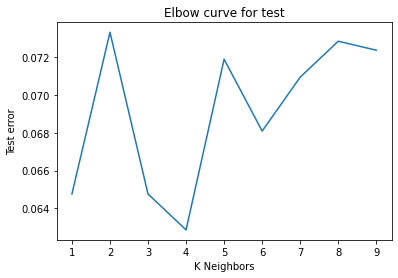

In [ ]:
#Elbow Method for optimal value of k in KMeans
def elbow(k):

    
    error_test = []

   
    for i in k:
       
        model = knn(n_neighbors=i)
        model.fit(X_train,y_train)
         
        tmp =model.predict(X_test)
        tmp = metrics.accuracy_score(tmp,y_test)
        error = 1-tmp
        error_test.append(error)
    return error_test
k = range(1,10)
test = elbow(k)
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')
plt.show()

m={}
for i in range(1,10):
    m[i]=np.interp(i,k,test)

val=1
for j in range(1,10):
    if(val>m[j]):
        val=m[j]
        num=j


In [ ]:
model = knn(n_neighbors=num)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
model.score(X_test, y_test)

0.8638095238095238

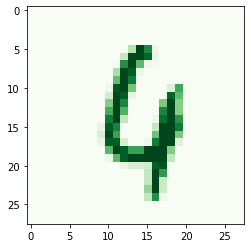

Label:
[4]


In [71]:
r=random.randint(0,7000)
randomdig=X[r]
randomdig_img=randomdig.reshape((28,28))
plt.figure()
plt.imshow(randomdig_img,cmap='Greens')
plt.show()
prediction=model.predict([randomdig])
print("Label:")
print(prediction)